# Tarea 03 - Análisis de datos geoespaciales mediante pandas, plotly, geopandas y folium
Ashuin Sharma - <br>
Ricardo Corrales Barquero - B32090 <br>
José P. Barrantes - B0043

## Librerías

In [6]:
# OJO: es importante tener la última versión de geopandas, esta es la única forma que he encontrado de instalarla (Ricardo).

pip install geopandas==0.10.2

  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.9.0
    Uninstalling geopandas-0.9.0:
      Successfully uninstalled geopandas-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
from owslib.wfs import WebFeatureService # lectura de los WFS
import geopandas as gpd                  # dataframes con extensiones geoesaciales
import requests                          # herramienta para solicitudes HTTP
from geojson import dump                 # exportación de .geojson
import pandas as pd                      # uso de dataframes
import plotly.express as px              # graficación interactiva

In [2]:
gpd.__version__

'0.10.2'

## Obtención de datos

In [3]:
# Parámetros de la solicitud
params = dict(service='WFS',
              version='1.1.0', 
              request='GetFeature', 
              typeName='IGN_5:limitecantonal_5k',   # la de interés
              srsName='urn:ogc:def:crs:EPSG::4326',
              outputFormat='json')

# Solicitud
response_cantones = requests.get("https://geos.snitcr.go.cr/be/IGN_5/wfs?", params=params)

# Descarga de la respuesta en un archivo GeoJSON

with open('../datos/limite_cantonal.geojson', 'w') as file:
    dump(response_cantones.json(), file)

# Lectura como geodataframe
data_cantones = gpd.read_file('../datos/limite_cantonal.geojson')

# Despliegue de la tabla
data_cantones

,id,gmlid,cod_catalo,cod_canton,canton,ori_toponi,area,cod_provin,provincia,version,geometry
0,limitecantonal_5k.1,limitecantonal_5k.1,160104,610,Corredores,Tiene su origen en el topónimo del río Corredo...,623.61,6,Puntarenas,20201222,"POLYGON ((-82.94161 8.42039, -82.94163 8.42039..."
1,limitecantonal_5k.2,limitecantonal_5k.2,160104,607,Golfito,"Se debe a la forma que presenta el litoral, d...",1752.75,6,Puntarenas,20201222,"MULTIPOLYGON (((-83.46678 8.68886, -83.46677 8..."
2,limitecantonal_5k.3,limitecantonal_5k.3,160104,608,Coto Brus,De origen indígena las palabras Coto (couto) B...,944.24,6,Puntarenas,20201222,"POLYGON ((-82.90501 8.77425, -82.90572 8.77456..."
3,limitecantonal_5k.4,limitecantonal_5k.4,160104,605,Osa,"En recuerdo del cacique Osa, que en los inicio...",1932.70,6,Puntarenas,20201222,"POLYGON ((-83.83946 9.25534, -83.83900 9.25533..."
4,limitecantonal_5k.5,limitecantonal_5k.5,160104,603,Buenos Aires,El nombre se le dio por la brisa constante que...,2382.94,6,Puntarenas,20201222,"POLYGON ((-83.32101 9.38409, -83.32072 9.38405..."
...,...,...,...,...,...,...,...,...,...,...,...
77,limitecantonal_5k.78,limitecantonal_5k.78,160104,215,Guatuso,Dos versiones: 1- Los indigenas vivían cerca d...,752.83,2,Alajuela,20201222,"POLYGON ((-84.80404 10.85084, -84.80379 10.850..."
78,limitecantonal_5k.79,limitecantonal_5k.79,160104,214,Los Chiles,Dos versiones: 1-Por una gran plantación de ch...,1332.71,2,Alajuela,20201222,"POLYGON ((-84.66639 11.07246, -84.60604 11.038..."
79,limitecantonal_5k.80,limitecantonal_5k.80,160104,501,Liberia,El origen del nombre del cantón se remonta a 1...,1442.17,5,Guanacaste,20201222,"POLYGON ((-85.47140 10.96502, -85.47129 10.965..."
80,limitecantonal_5k.81,limitecantonal_5k.81,160104,213,Upala,Voz indígena del náhualt que significa: sobre ...,1592.67,2,Alajuela,20201222,"POLYGON ((-85.24049 11.06368, -85.23930 11.063..."


In [4]:
# Solicitud de capa WFS de red vial mediante GET, para retornarse como JSON

# Parámetros de la solicitud
params = dict(service='WFS',
              version='1.1.0', 
              request='GetFeature', 
              typeName='IGN_200:redvial_200k',       # la de interés
              srsName='urn:ogc:def:crs:EPSG::4326',
              outputFormat='json')

# Solicitud
response = requests.get("https://geos.snitcr.go.cr/be/IGN_200/wfs?version=1.1.0", params=params)

# Descarga de la respuesta en un archivo GeoJSON

with open('../datos/red_vial.geojson', 'w') as file:
    dump(response.json(), file)


# Lectura como geodataframe
data_red_vial = gpd.read_file('../datos/red_vial.geojson')

# Despliegue de la tabla
data_red_vial

,origen,categoria,codigo,num_ruta,jerarquia,nombre,num_carril,mat_supe,est_supe,condi_uso,...,refname,ltscale,extx,exty,extz,docname,docpath,doctype,docver,geometry
0,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-83.59831 10.46632, -83.59831 10.4..."
1,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-83.61624 10.49796, -83.61351 10.4..."
2,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-83.60832 10.49670, -83.60765 10.5..."
3,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-83.74584 10.55466, -83.74696 10.5..."
4,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-83.64895 10.46992, -83.65056 10.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,CR25,AUTOPISTA,130101,1,None,AUTOPISTA GENERAL CAÑAS,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-84.09824 9.93583, -84.09831 9.937..."
5726,CR25,AUTOPISTA,130101,39,None,None,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-84.06262 9.94642, -84.06159 9.945..."
5727,CR25,AUTOPISTA,130101,27,None,AUTOPISTA JOSÉ MARÍA CASTRO MADRIZ,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-84.71120 9.91650, -84.71007 9.916..."
5728,CR25,AUTOPISTA,130101,27,None,AUTOPISTA PROSPERO FERNÁNDEZ,None,None,None,None,...,None,0,0,0,0,None,None,None,None,"LINESTRING (-84.21862 9.93646, -84.21417 9.936..."


## Cálculo de la intersección de líneas dentro de los cantones
Para determinar la densidad de carrteras para cada cantón, necesitamos obtener los fragmentos de carretera que se encuentran únicamente dentro de cada cantón. El método overlay() de GeoPandas nos será útil para esto. Así podremos crear un nuevo set de datos con los fragmentos de autopista contenidos en cada cantón, otra ventaja de overlay() es que nos permite conservar los atributos de los cantones y de la red vial.

In [5]:
red_vial_por_canton = data_red_vial.overlay(data_cantones, how='intersection')
red_vial_por_canton

C:\Users\ricor\anaconda3\lib\site-packages\geopandas\geodataframe.py:2196: UserWarning: `keep_geom_type=True` in overlay resulted in 218 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


,origen,categoria,codigo,num_ruta,jerarquia,nombre,num_carril,mat_supe,est_supe,condi_uso,...,gmlid,cod_catalo,cod_canton,canton,ori_toponi,area,cod_provin,provincia,version,geometry
0,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,limitecantonal_5k.70,160104,702,Pococí,Se le asignó en recuerdo de la provincia indíg...,2408.76,7,Limón,20201222,"LINESTRING (-83.59831 10.46632, -83.59831 10.4..."
1,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,limitecantonal_5k.70,160104,702,Pococí,Se le asignó en recuerdo de la provincia indíg...,2408.76,7,Limón,20201222,"LINESTRING (-83.61624 10.49796, -83.61351 10.4..."
2,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,limitecantonal_5k.70,160104,702,Pococí,Se le asignó en recuerdo de la provincia indíg...,2408.76,7,Limón,20201222,"LINESTRING (-83.60832 10.49670, -83.60765 10.5..."
3,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,limitecantonal_5k.70,160104,702,Pococí,Se le asignó en recuerdo de la provincia indíg...,2408.76,7,Limón,20201222,"LINESTRING (-83.74584 10.55466, -83.74696 10.5..."
4,CR25,CAMINO DE TIERRA,130107,None,None,None,None,None,None,None,...,limitecantonal_5k.70,160104,702,Pococí,Se le asignó en recuerdo de la provincia indíg...,2408.76,7,Limón,20201222,"LINESTRING (-83.64895 10.46992, -83.65056 10.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6610,CR25,CARRETERA PAVIMENTO UNA VIA,130103,None,None,None,None,None,None,None,...,limitecantonal_5k.53,160104,408,Flores,El nombre del cantón se otorgá en memoria del...,6.75,4,Heredia,20201222,"MULTILINESTRING ((-84.13398 10.00974, -84.1350..."
6611,CR25,CARRETERA PAVIMENTO DOS VIAS O MAS,130102,129,None,None,None,None,None,None,...,limitecantonal_5k.53,160104,408,Flores,El nombre del cantón se otorgá en memoria del...,6.75,4,Heredia,20201222,"LINESTRING (-84.16732 9.99574, -84.16710 9.995..."
6612,CR25,CARRETERA PAVIMENTO DOS VIAS O MAS,130102,123,None,None,None,None,None,None,...,limitecantonal_5k.53,160104,408,Flores,El nombre del cantón se otorgá en memoria del...,6.75,4,Heredia,20201222,"LINESTRING (-84.15059 10.00034, -84.14973 10.0..."
6613,CR25,CARRETERA PAVIMENTO DOS VIAS O MAS,130102,119,None,None,None,None,None,None,...,limitecantonal_5k.53,160104,408,Flores,El nombre del cantón se otorgá en memoria del...,6.75,4,Heredia,20201222,"LINESTRING (-84.14335 10.01374, -84.14335 10.0..."


El resultado es un geodataframe con la información de los fragmentos de carretera (filas), y sus respectivos atriburos (columnas)

## Cálculo de la longitud de los fragmentos de autopista

La longitud será almacenada en la columna longitud. Dividimos para considerar Km como unidad de medida.

In [6]:
red_vial_por_canton['longitud_km'] = red_vial_por_canton.geometry.to_crs(5367).length / 1000

In [7]:
red_vial_por_canton.longitud_km

0       8.744951
1       8.188802
2       2.135535
3       2.302053
4       8.779121
          ...   
6610    0.477715
6611    1.772530
6612    2.495700
6613    1.442070
6614    2.754299
Name: longitud_km, Length: 6615, dtype: float64

### Vamos a determinar cuantos km de carretera de cada tipo hay en cada cantón

In [8]:
metricas_canton_categoria = red_vial_por_canton.groupby(['canton', 'categoria']).agg(longitud_km=('longitud_km', sum)).reset_index()

metricas_canton_categoria

,canton,categoria,longitud_km
0,Abangares,CAMINO DE TIERRA,331.974330
1,Abangares,CARRETERA PAVIMENTO DOS VIAS O MAS,27.801803
2,Abangares,CARRETERA PAVIMENTO UNA VIA,166.542215
3,Acosta,CAMINO DE TIERRA,134.985538
4,Acosta,CARRETERA PAVIMENTO DOS VIAS O MAS,61.873510
...,...,...,...
261,Vázquez de Coronado,CARRETERA PAVIMENTO DOS VIAS O MAS,39.489168
262,Vázquez de Coronado,CARRETERA PAVIMENTO UNA VIA,52.697501
263,Zarcero,CAMINO DE TIERRA,33.100991
264,Zarcero,CARRETERA PAVIMENTO DOS VIAS O MAS,13.691175


In [9]:
# Nuestra df base
metricas_canton = red_vial_por_canton.groupby(['canton']).agg(longitud_total_km=('longitud_km', sum)).reset_index() # suma todas las carreteras en el cantón, sin discriminar por tipo

# Acá sumamos el total de carretera, discriminando por tipo. Generamos una columna por tipo de carretera
for categoria_ in metricas_canton_categoria.categoria.unique():
    temp_df  = metricas_canton_categoria[metricas_canton_categoria.categoria == categoria_].groupby(['canton']).agg(longitud_km=('longitud_km', sum)).reset_index() # filtramos solo por la categoría en cuestión a la hora de hacer la sumatoria
    col_name = 'longitud_km_' + categoria_.lower().replace(' ', '_') # el nombre de la columna, pasamos a minúscula. También reemplazamos espacios en blanco por guiones bajos
    temp_df.rename(columns = {'longitud_km': col_name}, inplace = True) # renombramos la columna para 
    
    metricas_canton           = metricas_canton.merge(temp_df, how='left', on='canton') # el método merge() de pandas es equivalente al JOIN de SQL
    metricas_canton[col_name] = metricas_canton[col_name].fillna(0) # si el tipo de carretera no existe para el cantón, va a devolver NaN con el merge. Para este caso, los NaN pueden ser interpretados como 0

In [10]:
metricas_canton

,canton,longitud_total_km,longitud_km_camino_de_tierra,longitud_km_carretera_pavimento_dos_vias_o_mas,longitud_km_carretera_pavimento_una_via,longitud_km_autopista,longitud_km_carretera_sin_pavimento_dos_vias
0,Abangares,526.318348,331.974330,27.801803,166.542215,0.000000,0.000000
1,Acosta,318.511715,134.985538,61.873510,121.652667,0.000000,0.000000
2,Alajuela,458.009533,88.452023,186.163812,167.447436,15.946261,0.000000
3,Alajuelita,26.145619,0.551761,9.822212,15.771645,0.000000,0.000000
4,Alvarado,114.679926,29.163954,39.422903,24.724774,0.000000,21.368294
...,...,...,...,...,...,...,...
77,Turrialba,688.084095,251.619874,143.582803,270.827701,0.000000,22.053717
78,Turrubares,306.469978,201.945130,0.000000,46.432396,0.000000,58.092452
79,Upala,770.127924,339.287385,9.263710,418.675388,0.000000,2.901441
80,Vázquez de Coronado,123.561812,25.484231,39.489168,52.697501,5.890912,0.000000


## Nos falta determinar el área de cada cantón
Multiplicamos por 1e-6 para pasar de m2 a Km2

In [11]:
data_cantones['area_km2'] = data_cantones.geometry.to_crs(5367).area * 1e-6
data_cantones.area_km2

0      623.611701
1     1752.747402
2      944.235455
3     1932.697077
4     2382.939438
         ...     
77     752.825456
78    1332.709946
79    1442.168480
80    1592.673850
81    1385.381781
Name: area_km2, Length: 82, dtype: float64

### Ahora hacemos un merge de este atributo a nuestra dataframe metricas_canton

In [12]:
metricas_canton = metricas_canton.merge(data_cantones[['canton', 'area_km2']], how='left', on='canton')

In [13]:
metricas_canton['densidad_red_vial'] = metricas_canton.longitud_total_km / metricas_canton.area_km2
metricas_canton

,canton,longitud_total_km,longitud_km_camino_de_tierra,longitud_km_carretera_pavimento_dos_vias_o_mas,longitud_km_carretera_pavimento_una_via,longitud_km_autopista,longitud_km_carretera_sin_pavimento_dos_vias,area_km2,densidad_red_vial
0,Abangares,526.318348,331.974330,27.801803,166.542215,0.000000,0.000000,646.020541,0.814708
1,Acosta,318.511715,134.985538,61.873510,121.652667,0.000000,0.000000,342.561419,0.929794
2,Alajuela,458.009533,88.452023,186.163812,167.447436,15.946261,0.000000,391.622724,1.169517
3,Alajuelita,26.145619,0.551761,9.822212,15.771645,0.000000,0.000000,21.465269,1.218043
4,Alvarado,114.679926,29.163954,39.422903,24.724774,0.000000,21.368294,79.183938,1.448273
...,...,...,...,...,...,...,...,...,...
77,Turrialba,688.084095,251.619874,143.582803,270.827701,0.000000,22.053717,1589.246432,0.432962
78,Turrubares,306.469978,201.945130,0.000000,46.432396,0.000000,58.092452,416.247997,0.736268
79,Upala,770.127924,339.287385,9.263710,418.675388,0.000000,2.901441,1592.673850,0.483544
80,Vázquez de Coronado,123.561812,25.484231,39.489168,52.697501,5.890912,0.000000,223.925587,0.551799


## Un gráfico plotly de barras apiladas que muestre la longitud de los cinco tipos de red vial (autopistas, carreteras sin pavimento, caminos de tierra, etc.) en los 15 cantones de mayor longitud total de red vial.

In [14]:
top_15_longitud = metricas_canton.sort_values('longitud_total_km', ascending=False).head(15)
top_15_longitud

,canton,longitud_total_km,longitud_km_camino_de_tierra,longitud_km_carretera_pavimento_dos_vias_o_mas,longitud_km_carretera_pavimento_una_via,longitud_km_autopista,longitud_km_carretera_sin_pavimento_dos_vias,area_km2,densidad_red_vial
59,San Carlos,2591.060114,1681.485180,112.482571,797.092364,0.0,0.000000,3352.328969,0.772913
56,Pérez Zeledón,1429.560638,524.663691,316.750356,573.228060,0.0,14.918530,1901.082036,0.751972
54,Puntarenas,1368.162825,930.353850,0.000000,437.808976,0.0,0.000000,1840.370582,0.743417
10,Buenos Aires,1297.085971,691.732435,170.930281,434.423256,0.0,0.000000,2382.939438,0.544322
70,Sarapiquí,1103.353835,561.147774,110.717594,431.488468,0.0,0.000000,2144.380447,0.514533
35,Liberia,1070.443077,751.690852,39.948296,278.803929,0.0,0.000000,1442.168480,0.742246
52,Pococí,1058.021550,412.392879,132.560984,359.434806,0.0,153.632881,2408.763381,0.439238
45,Nicoya,982.178341,629.493097,20.657730,332.027514,0.0,0.000000,1337.569887,0.734301
68,Santa Cruz,965.178610,662.422593,0.000000,302.756017,0.0,0.000000,1320.809855,0.730748
7,Bagaces,847.540684,676.136467,29.012148,142.392069,0.0,0.000000,1277.925670,0.663216


### Para graficar, vamos a necesitar "derretir" la tabla, i.e. hacer que la tabla ancha sea más larga
Podríamos utilizar la el método melt() de pandas, pero en este caso será más sencillo si hacemos uso del dataset metricas_canton_categoria y luego filtramos.

In [15]:
top_15 = top_15_longitud.canton.to_list()
top_15_longitud_graficar = metricas_canton_categoria[metricas_canton_categoria.canton.isin(top_15)] # de nuestra df del principio, filtramos solo el top 15

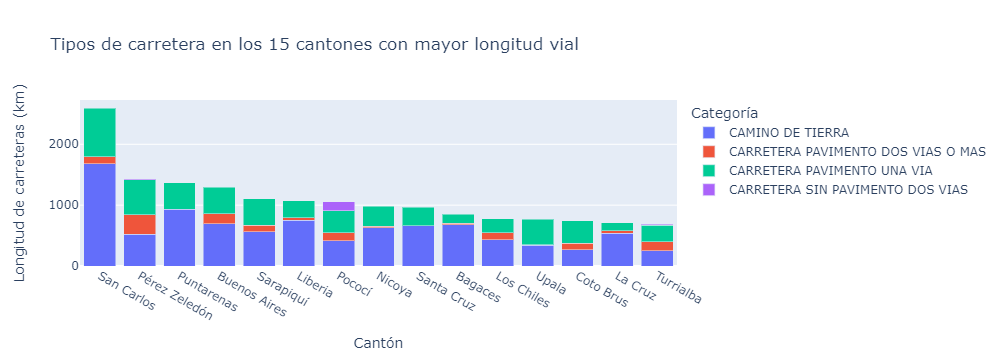

In [19]:
fig = px.bar(top_15_longitud_graficar, 
             x="canton", 
             y="longitud_km", 
             color="categoria",
             labels={
                 'canton': 'Cantón',
                 'longitud_km': 'Longitud de carreteras (km)',
                 'categoria': 'Categoría'
             },
             title="Tipos de carretera en los 15 cantones con mayor longitud vial")

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'array', 
                         'categoryarray':top_15_longitud.canton.to_list() # para ordenar. Cantones con más carreteras van primero
                        }
                 )
fig.show()

## Un gráfico plotly de pastel que muestre el porcentaje de red vial de los 15 cantones de mayor longitud total de la red vial, con respecto a la longitud de la red vial en todo el país.

In [40]:
top_15_pastel = top_15_longitud_graficar[['canton', 'longitud_km']].groupby('canton').sum().reset_index()
top_15_pastel

,canton,longitud_km
0,Bagaces,847.540684
1,Buenos Aires,1297.085971
2,Coto Brus,747.452550
3,La Cruz,714.135936
4,Liberia,1070.443077
5,Los Chiles,776.986909
6,Nicoya,982.178341
7,Pococí,1058.021550
8,Puntarenas,1368.162825
9,Pérez Zeledón,1429.560638


In [21]:
otros_cantones = metricas_canton_categoria[~metricas_canton_categoria.canton.isin(top_15)]
otros_cantones

,canton,categoria,longitud_km
0,Abangares,CAMINO DE TIERRA,331.974330
1,Abangares,CARRETERA PAVIMENTO DOS VIAS O MAS,27.801803
2,Abangares,CARRETERA PAVIMENTO UNA VIA,166.542215
3,Acosta,CAMINO DE TIERRA,134.985538
4,Acosta,CARRETERA PAVIMENTO DOS VIAS O MAS,61.873510
...,...,...,...
261,Vázquez de Coronado,CARRETERA PAVIMENTO DOS VIAS O MAS,39.489168
262,Vázquez de Coronado,CARRETERA PAVIMENTO UNA VIA,52.697501
263,Zarcero,CAMINO DE TIERRA,33.100991
264,Zarcero,CARRETERA PAVIMENTO DOS VIAS O MAS,13.691175


In [22]:
long = otros_cantones.longitud_km.sum()
long

15605.360957067956

In [41]:
top_15_pastel = pd.concat([top_15_pastel, pd.DataFrame({'canton': ['Otros cantones'], 'longitud_km': [long]})])
top_15_pastel

,canton,longitud_km
0,Bagaces,847.540684
1,Buenos Aires,1297.085971
2,Coto Brus,747.452550
3,La Cruz,714.135936
4,Liberia,1070.443077
5,Los Chiles,776.986909
6,Nicoya,982.178341
7,Pococí,1058.021550
8,Puntarenas,1368.162825
9,Pérez Zeledón,1429.560638


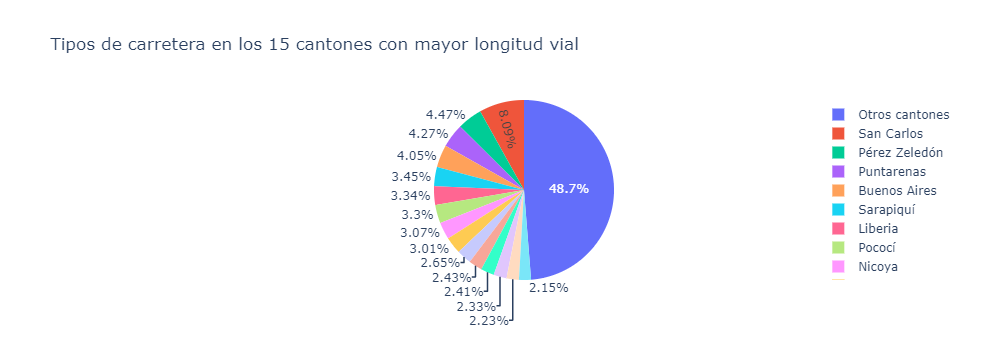

In [43]:
fig = px.pie(top_15_pastel, 
             names="canton", 
             values="longitud_km",
             title="Carreteras con mayor longitud vial",
             width=)

fig.show()